In [3]:
from skimage.morphology import skeletonize
from skimage import draw
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from skimage.io import imread
from skimage.util import img_as_float

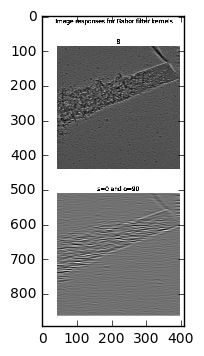

In [32]:
fir = '/Users/shilpika/Documents/code/Combustion-Filters/'
brick = img_as_float(imread(fname=fir+'f1.png',as_grey=True))

plt.imshow(brick,cmap=plt.cm.gray)
plt.show()

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


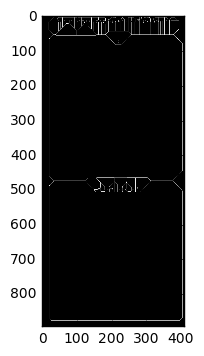

In [33]:
sk1 = skeletonize(brick)
print sk1
plt.imshow(sk1,cmap=plt.cm.gray)
plt.show()

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(400, 400)


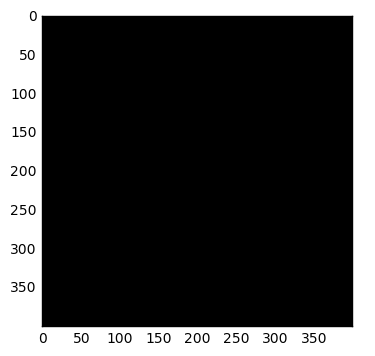

In [13]:
# an empty image
image = np.zeros((400, 400))

print image 
print image.shape
plt.imshow(image,cmap='gray')
plt.show()

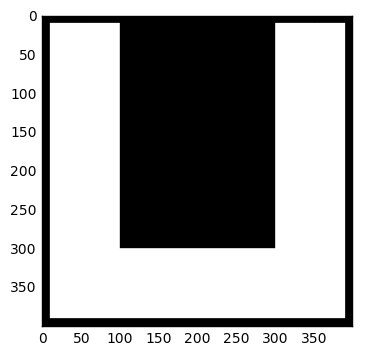

In [16]:
# foreground object 1
image[10:-10, 10:100] = 1
image[-100:-10, 10:-10] = 1
image[10:-10, -100:-10] = 1
plt.imshow(image,cmap='gray')
plt.show()

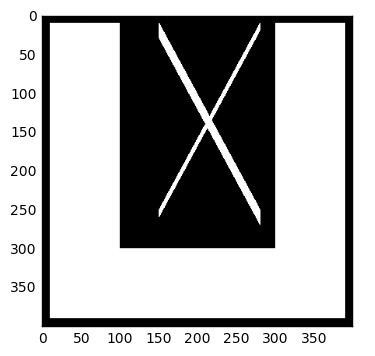

In [17]:
# foreground object 2
rs, cs = draw.line(250, 150, 10, 280)
for i in range(10):
    image[rs + i, cs] = 1
rs, cs = draw.line(10, 150, 250, 280)
for i in range(20):
    image[rs + i, cs] = 1

plt.imshow(image,cmap='gray')
plt.show()

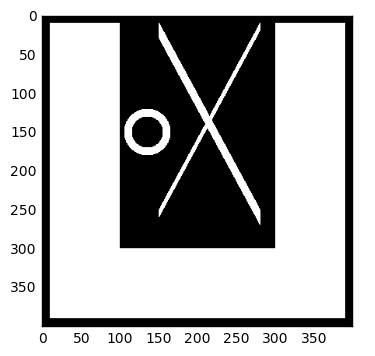

In [18]:
# foreground object 3
ir, ic = np.indices(image.shape)
circle1 = (ic - 135)**2 + (ir - 150)**2 < 30**2
circle2 = (ic - 135)**2 + (ir - 150)**2 < 20**2
image[circle1] = 1
image[circle2] = 0
plt.imshow(image,cmap='gray')
plt.show()

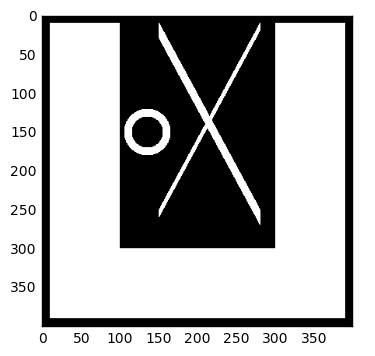

In [21]:
# perform skeletonization
skeleton = skeletonize(image)
plt.imshow(image,cmap=plt.cm.gray)
plt.show()

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


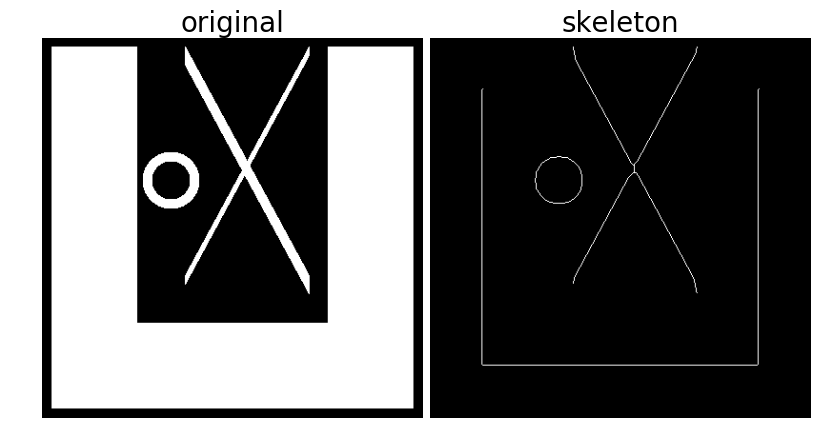

In [30]:
# display results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})

ax1.imshow(image, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('original', fontsize=20)

ax2.imshow(skeleton, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('skeleton', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.98,
                    bottom=0.02, left=0.02, right=0.98)

print skeleton
plt.show()

(5, 5)


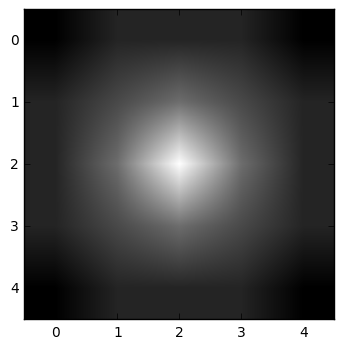

In [40]:
import numpy as np
from skimage.morphology import square
from skimage.morphology import white_tophat

bright_on_grey = np.array([[2, 3, 3, 3, 2],
                          [3, 4, 5, 4, 3],
                          [3, 5, 9, 5, 3],
                          [3, 4, 5, 4, 3],
                          [2, 3, 3, 3, 2]], dtype=np.uint8)

print bright_on_grey.shape
plt.imshow(bright_on_grey,cmap=plt.cm.gray)
plt.show()


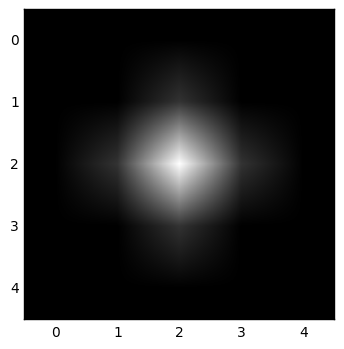

In [39]:
wth = white_tophat(bright_on_grey, square(3))
plt.imshow(wth,cmap=plt.cm.gray)
plt.show()